Translating the R sequences from https://arxiv.org/abs/1611.09477 into Python vtreat https://github.com/WinVector/pyvtreat

R original

Python translation

In [1]:
## ----msleep, tidy=TRUE---------------------------------------------------

In [2]:
import pandas
import vtreat # https://github.com/WinVector/pyvtreat


msleep = pandas.read_csv('msleep.csv')
msleep.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [3]:
msleep.dtypes

name             object
genus            object
vore             object
order            object
conservation     object
sleep_total     float64
sleep_rem       float64
sleep_cycle     float64
awake           float64
brainwt         float64
bodywt          float64
dtype: object

In [4]:
## ----isbad---------------------------------------------------------------

In [5]:
unsupervised_transform = vtreat.UnsupervisedTreatment()
msleep_prepared = unsupervised_transform.fit_transform(msleep)
msleep_prepared.head()

,vore_is_bad,conservation_is_bad,sleep_rem_is_bad,sleep_cycle_is_bad,brainwt_is_bad,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,...,order_lev_Lagomorpha,order_lev_Scandentia,conservation_prevalence_code,conservation_lev__NA_,conservation_lev_lc,conservation_lev_domesticated,conservation_lev_vu,conservation_lev_nt,conservation_lev_en,conservation_lev_cd
0,0.0,0.0,1.0,1.0,1.0,12.1,1.87541,0.439583,11.9,0.281581,...,0.0,0.0,0.325301,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,17.0,1.80000,0.439583,7.0,0.015500,...,0.0,0.0,0.349398,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,14.4,2.40000,0.439583,9.6,0.281581,...,0.0,0.0,0.048193,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,14.9,2.30000,0.133333,9.1,0.000290,...,0.0,0.0,0.325301,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,4.0,0.70000,0.666667,20.0,0.423000,...,0.0,0.0,0.120482,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
msleep_prepared.columns

Index(['vore_is_bad', 'conservation_is_bad', 'sleep_rem_is_bad',
       'sleep_cycle_is_bad', 'brainwt_is_bad', 'sleep_total', 'sleep_rem',
       'sleep_cycle', 'awake', 'brainwt',
       ...
       'order_lev_Lagomorpha', 'order_lev_Scandentia',
       'conservation_prevalence_code', 'conservation_lev__NA_',
       'conservation_lev_lc', 'conservation_lev_domesticated',
       'conservation_lev_vu', 'conservation_lev_nt', 'conservation_lev_en',
       'conservation_lev_cd'],
      dtype='object', length=206)

R original

Python translation

In [7]:
## ----novel, error=TRUE---------------------------------------------------

In [8]:
import pandas
import sklearn.linear_model
import vtreat # https://github.com/WinVector/pyvtreat


df = pandas.DataFrame({'x':['a', 'a', 'b', 'b', 'c', 'c'], 
                       'y':[i+1 for i in range(6)]})
df

,x,y
0,a,1
1,a,2
2,b,3
3,b,4
4,c,5
5,c,6


In [9]:
try:
    model = sklearn.linear_model.LinearRegression(fit_intercept = True).fit(df[['x']], df['y'])
except Exception as ex:
    print(ex)

could not convert string to float: 'a'


In [10]:
## ----vtreat, results='hide'----------------------------------------------

In [11]:
treatplan = vtreat.NumericOutcomeTreatment(outcome_name='y')
df_treated = treatplan.fit_transform(df, y = df['y'])
df_treated

,y,x_lev_c,x_lev_a
0,1,0.0,1.0
1,2,0.0,1.0
2,3,0.0,0.0
3,4,0.0,0.0
4,5,1.0,0.0
5,6,1.0,0.0


In [12]:
vars = [c for c in df_treated.columns if not c == 'y']
model = sklearn.linear_model.LinearRegression(fit_intercept = True).fit(df_treated[vars], df_treated['y'])

In [13]:
## ----indicators1---------------------------------------------------------

In [14]:
newdata = pandas.DataFrame({'x':['a', 'b', 'c', 'd']})
newdata

,x
0,a
1,b
2,c
3,d


In [15]:
## ----indicators2---------------------------------------------------------

In [16]:
newdata_treated = treatplan.transform(newdata)
newdata_treated

,x_lev_c,x_lev_a
0,0.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0


In [17]:
model.predict(newdata_treated)

array([1.5, 3.5, 5.5, 3.5])

R original

Python translation

In [18]:
## ----zipcode-------------------------------------------------------------

In [19]:
import numpy.random
import pandas
import seaborn
import matplotlib.pyplot
import vtreat # https://github.com/WinVector/pyvtreat


numpy.random.seed(235)
Nz = 25
zip = ['z' + str(i+1).zfill(5) for i in range(Nz)]
zipval = { zip[i]:(i+1) for i in range(Nz) }
n = 3
m = Nz - n
p = [(0.8/n) for i in range(n)] + [0.2/m for i in range(m)]
N = 1000
zipvar = numpy.random.choice(zip, size=N, p=p)
zipvar
signal = [zipval[zv] for zv in zipvar]
d = pandas.DataFrame({'zip':zipvar, 
                      'y':signal + numpy.random.normal(size=N)})
d.head()

,zip,y
0,z00018,18.522012
1,z00002,1.193435
2,z00001,0.739880
3,z00018,17.157941
4,z00002,2.243728


In [20]:
## ----vzip, results="hide", warning=FALSE, message=FALSE------------------

In [21]:
treatplan = vtreat.NumericOutcomeTreatment(outcome_name='y')
d_treated = treatplan.fit_transform(d, d["y"])
d_treated.head()

,y,zip_impact_code,zip_prevalence_code,zip_lev_z00002,zip_lev_z00003,zip_lev_z00001
0,18.522012,12.660483,0.014,0.0,0.0,0.0
1,1.193435,-2.851277,0.277,1.0,0.0,0.0
2,0.739880,-3.928832,0.235,0.0,0.0,1.0
3,17.157941,12.776066,0.014,0.0,0.0,0.0
4,2.243728,-2.851277,0.277,1.0,0.0,0.0


In [22]:
## ----ziptreatplan--------------------------------------------------------

In [23]:
treatplan.score_frame_

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,significance,vcount,default_threshold,recommended
0,zip_impact_code,zip,impact_code,True,True,0.987907,0.000000e+00,1.0,0.250000,True
1,zip_deviation_code,zip,deviation_code,True,True,-0.049652,1.166190e-01,1.0,0.250000,False
2,zip_prevalence_code,zip,prevalence_code,False,True,-0.833001,8.590593e-259,1.0,0.250000,True
3,zip_lev_z00002,zip,indicator_code,False,True,-0.283480,6.165256e-20,3.0,0.083333,True
4,zip_lev_z00003,zip,indicator_code,False,True,-0.179725,1.046927e-08,3.0,0.083333,True
5,zip_lev_z00001,zip,indicator_code,False,True,-0.348631,5.932392e-30,3.0,0.083333,True


In [24]:
## ----zipfig, echo=FALSE, message=FALSE, warning=FALSE, fig.width=6, fig.height=4----

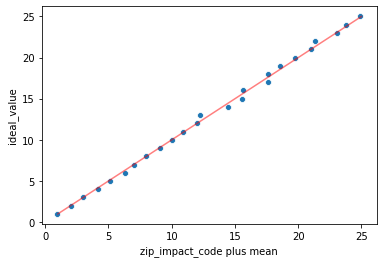

In [25]:
# show, subject to mean shift impact estimates track un-observed (pre-noise) ideal values
d_new = pandas.DataFrame({'zip':zip})
d_new_treated = treatplan.transform(d_new)[['zip_impact_code']]
d_new_treated["zip"] = d_new["zip"]
d_new_treated["ideal_value"] = [zipval[k] for k in d_new_treated["zip"]]
d_new_treated["zip_impact_code plus mean"] = d_new_treated["zip_impact_code"] + numpy.mean(d["y"])
seaborn.scatterplot(x="zip_impact_code plus mean", y='ideal_value', data = d_new_treated)
min = numpy.min(d_new_treated["ideal_value"])
max = numpy.max(d_new_treated["ideal_value"])
matplotlib.pyplot.plot([min, max], [min, max], color = 'red', alpha=0.5)

R original

Python translation

In [26]:
## ----zipmissing, warning=FALSE, message=FALSE----------------------------

In [27]:
N = 100
zipvar = numpy.random.choice(zip, size=N, p=p)
d = pandas.DataFrame({'zip':zipvar, 
                      'y':[zipval[zv] for zv in zipvar] + numpy.random.normal(size=N)})
len(numpy.unique(d['zip']))

16

In [28]:
omitted = set(zip) - set(d['zip'])
omitted

{'z00004',
 'z00006',
 'z00008',
 'z00009',
 'z00014',
 'z00016',
 'z00017',
 'z00023',
 'z00025'}

In [29]:
## ----zipmissing2, warning=FALSE, message=FALSE---------------------------

In [30]:
treatplan = vtreat.NumericOutcomeTreatment(outcome_name='y')
d_treated = treatplan.fit_transform(d, d["y"])
dnew = pandas.DataFrame({'zip':zip})
dtreated = treatplan.transform(dnew)
dtreated["zip"] = dnew["zip"]
dtreated.head()

,zip_impact_code,zip_prevalence_code,zip_lev_z00003,zip_lev_z00001,zip_lev_z00002,zip
0,-4.152427,0.26,0.0,1.0,0.0,z00001
1,-3.061531,0.21,0.0,0.0,1.0,z00002
2,-1.925327,0.27,1.0,0.0,0.0,z00003
3,0.000000,0.00,0.0,0.0,0.0,z00004
4,0.517125,0.05,0.0,0.0,0.0,z00005


In [31]:
## ----zipmissingprint-----------------------------------------------------

In [32]:
dtreated.loc[[zi in omitted for zi in dnew["zip"]], :].head()

,zip_impact_code,zip_prevalence_code,zip_lev_z00003,zip_lev_z00001,zip_lev_z00002,zip
3,0.0,0.0,0.0,0.0,0.0,z00004
5,0.0,0.0,0.0,0.0,0.0,z00006
7,0.0,0.0,0.0,0.0,0.0,z00008
8,0.0,0.0,0.0,0.0,0.0,z00009
13,0.0,0.0,0.0,0.0,0.0,z00014


R original

Python translation

In [33]:
## ----nested--------------------------------------------------------------

In [34]:
numpy.random.seed(2262)
nLev = 500
n = 3000
d = pandas.DataFrame({'xBad1':numpy.random.choice(['level' + str(i+1) for i in range(nLev)], size=n), 
                      'xBad2':numpy.random.choice(['level' + str(i+1) for i in range(nLev)], size=n), 
                      'xGood1':numpy.random.choice(['level' + str(i+1) for i in range(nLev)], size=n), 
                      'xGood2':numpy.random.choice(['level' + str(i+1) for i in range(nLev)], size=n)})
target = set(['level' + str(i+1) for i in range(int(numpy.floor(nLev/2)))])
d['y'] = (0.2*numpy.random.normal(size=n) + 
          0.5*numpy.asarray([1 if (v in target) else -1 for v in d['xGood1']]) +
          0.3*numpy.asarray([1 if (v in target) else -1 for v in d['xGood2']]))>0
d['rgroup'] = numpy.random.choice(["cal", "train", "test"], size=n,
                   p=[0.6, 0.2, 0.2])
d.head()

,xBad1,xBad2,xGood1,xGood2,y,rgroup
0,level246,level135,level316,level324,False,train
1,level462,level92,level165,level95,True,test
2,level93,level163,level57,level426,False,train
3,level96,level291,level14,level104,True,test
4,level21,level422,level111,level179,True,train


In [35]:
import sklearn.metrics 

def plotRes(d, predName, yName, title, threshold=0.5):
    print(title)
    decision = d[predName]>threshold
    tab = sklearn.metrics.confusion_matrix(y_true=d[yName], y_pred=decision)
    print('confusion matrix:\n', tab)
    acc = sklearn.metrics.accuracy_score(y_true=d[yName], y_pred=decision)
    prec = sklearn.metrics.precision_score(y_true=d[yName], y_pred=decision)
    recall = sklearn.metrics.recall_score(y_true=d[yName], y_pred=decision)
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(d[yName], d[predName], pos_label=True)
    auc = sklearn.metrics.auc(fpr, tpr)
    print('auc:', format("{:.2f}".format(auc)))
    print('accuracy:', format("{:.2f}".format(acc)))
    print('precision:', format("{:.2f}".format(prec)))
    print('recall:', format("{:.2f}".format(recall)))

R original

Python translation

In [36]:
## ----naivesplit----------------------------------------------------------

In [37]:
dTrain = d.loc[d['rgroup']!='test', :].copy()
dTest = d.loc[d['rgroup']=='test', :].copy()
treatments = vtreat.BinomialOutcomeTreatment(outcome_name='y',
                                             cols_to_copy=['rgroup'],
                                             outcome_target=True,
                                             params = vtreat.vtreat_parameters({
                                                 'filter_to_recommended':False,
                                                 'coders':['logit_code']
                                             }))
treatments.fit(dTrain, dTrain['y'])
dTrainTreated = treatments.transform(dTrain)
dTrainTreated.head()

,y,rgroup,xBad1_logit_code,xBad2_logit_code,xGood1_logit_code,xGood2_logit_code
0,False,train,-0.421149,-0.107432,-5.400537,-0.307786
1,False,train,-4.960027,-0.213524,0.150727,-5.210274
2,True,train,0.276332,0.186973,0.668995,-0.220700
3,True,cal,-0.098178,0.186973,0.668160,0.086281
4,True,train,-0.183694,0.277668,0.666911,0.665988


In [38]:
vars = [v for v in treatments.score_frame_['variable']]
vars

['xBad1_logit_code',
 'xBad2_logit_code',
 'xGood1_logit_code',
 'xGood2_logit_code']

In [39]:
## ----naivefit, warning=FALSE---------------------------------------------

In [40]:
import sklearn.linear_model

m1 = sklearn.linear_model.LogisticRegression().fit(
    dTrainTreated[vars], dTrainTreated['y'])
print(m1.intercept_)
print(m1.coef_)

[1.02558567]
[[3.06219465 2.87873139 3.28130417 4.09167914]]


In [41]:
## ----nf2-----------------------------------------------------------------

In [42]:
dTrain['predM1'] = m1.predict_proba(dTrainTreated[vars])[:, 1]

In [43]:
dTrain.head()

,xBad1,xBad2,xGood1,xGood2,y,rgroup,predM1
0,level246,level135,level316,level324,False,train,3.221282e-09
2,level93,level163,level57,level426,False,train,3.453925e-16
4,level21,level422,level111,level179,True,train,9.759237e-01
5,level447,level378,level228,level224,True,cal,9.783033e-01
8,level472,level376,level245,level206,True,train,9.979251e-01


In [44]:
plotRes(dTrain, 'predM1', 'y', 'model1 on train')

model1 on train
confusion matrix:
 [[1084   82]
 [  50 1171]]
auc: 0.99
accuracy: 0.94
precision: 0.93
recall: 0.96


R original

Python version

In [45]:
dTestTreated = treatments.transform(dTest)
dTest['predM1'] = m1.predict_proba(dTestTreated[vars])[:,1]
plotRes(dTest, 'predM1', 'y', 'model1 on test')

model1 on test
confusion matrix:
 [[234  47]
 [ 91 241]]
auc: 0.83
accuracy: 0.77
precision: 0.84
recall: 0.73


R original

In [46]:
## ----calset1, message=FALSE, warning=FALSE-------------------------------

In [47]:
dCal = d.loc[d['rgroup']=='cal', :].copy()
dTrain = d.loc[d['rgroup']=='train', :].copy()
dTest = d.loc[d['rgroup']=='test', :].copy()

treatments = vtreat.BinomialOutcomeTreatment(outcome_name='y',
                                             cols_to_copy=['rgroup'],
                                             outcome_target=True,
                                             params = vtreat.vtreat_parameters({
                                                 'filter_to_recommended':False,
                                                 'coders':['logit_code']
                                             }))
treatments.fit(dCal, dCal['y'])
dTrainTreated = treatments.transform(dTrain)
newvars = [v for v in treatments.score_frame_['variable']]
m1 = sklearn.linear_model.LogisticRegression().fit(
    dTrainTreated[newvars], dTrainTreated['y'])
dTrain['predM1'] = m1.predict_proba(dTrainTreated[vars])[:,1]

In [48]:
## ----calset2-------------------------------------------------------------

In [49]:
plotRes(dTrain, 'predM1', 'y', 'model1 on train')

model1 on train
confusion matrix:
 [[180 116]
 [ 17 299]]
auc: 0.91
accuracy: 0.78
precision: 0.72
recall: 0.95


In [50]:
## ----calset3-------------------------------------------------------------

In [51]:
dTest['predM1'] = m1.predict_proba(dTestTreated[vars])[:,1]
plotRes(dTest, 'predM1', 'y', 'model1 on test')

model1 on test
confusion matrix:
 [[172 109]
 [ 25 307]]
auc: 0.90
accuracy: 0.78
precision: 0.74
recall: 0.92


R original

Python version

In [52]:
## ----sigprune_data-------------------------------------------------------

In [53]:
numpy.random.seed(22451)
N = 500
sigN = numpy.random.normal(size=N)
noiseN = numpy.random.normal(N)
Nlevels = 100
zip = ['z' + str(i+1).zfill(5) for i in range(Nlevels)]
zipval = { z:numpy.random.uniform(size=1)[0] for z in zip }
sigC = numpy.random.choice(zip, size=N)
noiseC = numpy.random.choice(zip, size=N)
y = (numpy.asarray(sigN) + 
     numpy.asarray([zipval[v] for v in sigC]) + 
     numpy.random.normal(size=N))
df = pandas.DataFrame({'sN':sigN, 
                       'nN':noiseN, 
                       'sC':sigC, 
                       'nC':noiseC,
                       'y':y})
df.head()

,sN,nN,sC,nC,y
0,-0.134210,497.590133,z00042,z00027,-0.196731
1,0.260726,497.590133,z00060,z00005,0.766681
2,0.133719,497.590133,z00054,z00091,-0.938968
3,-0.438525,497.590133,z00032,z00084,-0.840667
4,0.532758,497.590133,z00078,z00069,1.033514


R original

Python version

In [54]:
## ----sigprune_treat------------------------------------------------------

In [55]:
treatplan = vtreat.NumericOutcomeTreatment(outcome_name='y') 
treatplan.fit(df, df['y'])
treatplan.score_frame_
sframe = treatplan.score_frame_.copy()
sframe = sframe.loc[sframe['treatment']!='indicator_code', :]
sframe.reset_index(inplace=True, drop=True)
sframe

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,significance,vcount,default_threshold,recommended
0,sN,sN,clean_copy,False,True,0.716235,7.825971e-80,1.0,0.250,True
1,sC_impact_code,sC,impact_code,True,True,0.097654,2.900827e-02,2.0,0.125,True
2,sC_deviation_code,sC,deviation_code,True,True,-0.008458,8.503599e-01,2.0,0.125,False
3,sC_prevalence_code,sC,prevalence_code,False,True,0.010933,8.073285e-01,2.0,0.125,False
4,nC_impact_code,nC,impact_code,True,True,-0.007808,8.617447e-01,2.0,0.125,False
5,nC_deviation_code,nC,deviation_code,True,True,0.008380,8.517242e-01,2.0,0.125,False
6,nC_prevalence_code,nC,prevalence_code,False,True,0.021464,6.320796e-01,2.0,0.125,False


R original

Python version

In [56]:
## ----sigprune_plot, echo=FALSE, fig.width=6, fig.height=4----------------

In [57]:
sframe["varType"] = [ "signal" if v in set(['sN', 'sC']) else "noise" for v in sframe["orig_variable"]]
sframe

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,significance,vcount,default_threshold,recommended,varType
0,sN,sN,clean_copy,False,True,0.716235,7.825971e-80,1.0,0.250,True,signal
1,sC_impact_code,sC,impact_code,True,True,0.097654,2.900827e-02,2.0,0.125,True,signal
2,sC_deviation_code,sC,deviation_code,True,True,-0.008458,8.503599e-01,2.0,0.125,False,signal
3,sC_prevalence_code,sC,prevalence_code,False,True,0.010933,8.073285e-01,2.0,0.125,False,signal
4,nC_impact_code,nC,impact_code,True,True,-0.007808,8.617447e-01,2.0,0.125,False,noise
5,nC_deviation_code,nC,deviation_code,True,True,0.008380,8.517242e-01,2.0,0.125,False,noise
6,nC_prevalence_code,nC,prevalence_code,False,True,0.021464,6.320796e-01,2.0,0.125,False,noise


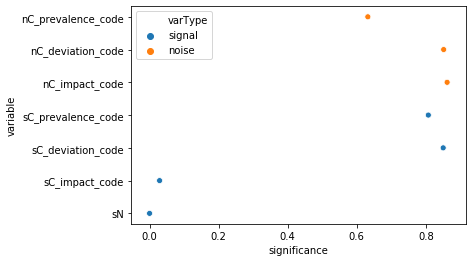

In [58]:
import seaborn

seaborn.scatterplot(x='significance', y='variable', hue = 'varType', data=sframe)

R original

Python version

In [59]:
## ----sigprune_prune------------------------------------------------------

In [60]:
sframe

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,significance,vcount,default_threshold,recommended,varType
0,sN,sN,clean_copy,False,True,0.716235,7.825971e-80,1.0,0.250,True,signal
1,sC_impact_code,sC,impact_code,True,True,0.097654,2.900827e-02,2.0,0.125,True,signal
2,sC_deviation_code,sC,deviation_code,True,True,-0.008458,8.503599e-01,2.0,0.125,False,signal
3,sC_prevalence_code,sC,prevalence_code,False,True,0.010933,8.073285e-01,2.0,0.125,False,signal
4,nC_impact_code,nC,impact_code,True,True,-0.007808,8.617447e-01,2.0,0.125,False,noise
5,nC_deviation_code,nC,deviation_code,True,True,0.008380,8.517242e-01,2.0,0.125,False,noise
6,nC_prevalence_code,nC,prevalence_code,False,True,0.021464,6.320796e-01,2.0,0.125,False,noise
